Epoch 1/75
125/125 [==============================] - 6s 35ms/step - loss: 1.3830 - accuracy: 0.5318 - val_loss: 0.3209 - val_accuracy: 0.9160
Epoch 2/75
125/125 [==============================] - 4s 30ms/step - loss: 0.6257 - accuracy: 0.8005 - val_loss: 0.1717 - val_accuracy: 0.9510
Epoch 3/75
125/125 [==============================] - 4s 31ms/step - loss: 0.4697 - accuracy: 0.8528 - val_loss: 0.1208 - val_accuracy: 0.9600
Epoch 4/75
125/125 [==============================] - 4s 36ms/step - loss: 0.3769 - accuracy: 0.8788 - val_loss: 0.0963 - val_accuracy: 0.9700
Epoch 5/75
125/125 [==============================] - 4s 34ms/step - loss: 0.3476 - accuracy: 0.8947 - val_loss: 0.1097 - val_accuracy: 0.9700
Epoch 6/75
125/125 [==============================] - 5s 36ms/step - loss: 0.3283 - accuracy: 0.9010 - val_loss: 0.0746 - val_accuracy: 0.9780
Epoch 7/75
125/125 [==============================] - 5s 36ms/step - loss: 0.2841 - accuracy: 0.9153 - val_loss: 0.0843 - val_accuracy: 0.9750

Epoch 58/75
125/125 [==============================] - 4s 29ms/step - loss: 0.0696 - accuracy: 0.9783 - val_loss: 0.0417 - val_accuracy: 0.9860
Epoch 59/75
125/125 [==============================] - 4s 33ms/step - loss: 0.0662 - accuracy: 0.9780 - val_loss: 0.0388 - val_accuracy: 0.9870
Epoch 60/75
125/125 [==============================] - 5s 36ms/step - loss: 0.0638 - accuracy: 0.9805 - val_loss: 0.0553 - val_accuracy: 0.9830
Epoch 61/75
125/125 [==============================] - 4s 34ms/step - loss: 0.0660 - accuracy: 0.9795 - val_loss: 0.0287 - val_accuracy: 0.9870
Epoch 62/75
125/125 [==============================] - 4s 35ms/step - loss: 0.0557 - accuracy: 0.9815 - val_loss: 0.0262 - val_accuracy: 0.9890
Epoch 63/75
125/125 [==============================] - 4s 35ms/step - loss: 0.0524 - accuracy: 0.9825 - val_loss: 0.0357 - val_accuracy: 0.9870
Epoch 64/75
125/125 [==============================] - 4s 35ms/step - loss: 0.0494 - accuracy: 0.9827 - val_loss: 0.0366 - val_accuracy:

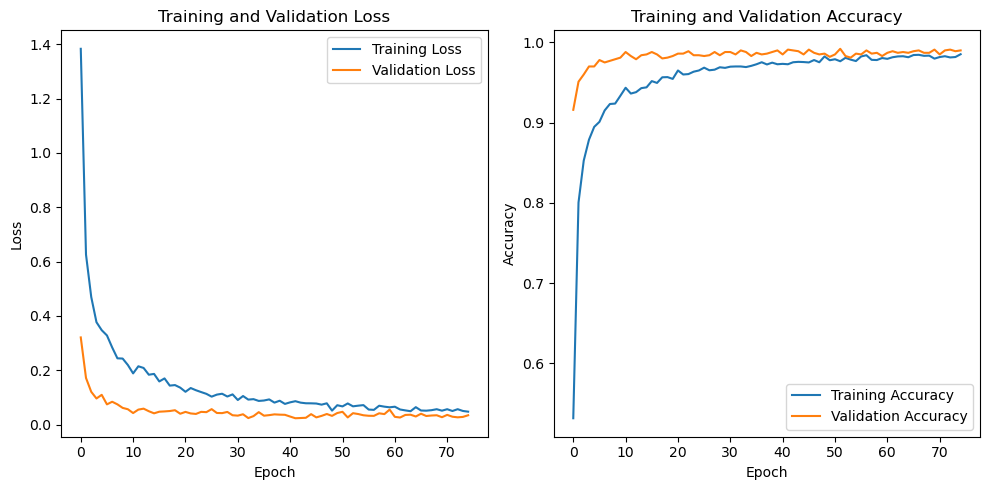

In [238]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
(x_train, y_train), (_, _) = mnist.load_data()

# Filter out digits 0-9 with 15-20 examples each
num_examples_per_digit = 500
num_examples = {digit: 0 for digit in range(10)}

# Initialize empty lists to store filtered images and labels
filtered_images = []
filtered_labels = []

# Filter out images and labels corresponding to digits 0-9
for i in range(len(x_train)):
    digit = y_train[i]
    if num_examples[digit] < num_examples_per_digit:
        filtered_images.append(x_train[i])
        filtered_labels.append(y_train[i])
        num_examples[digit] += 1

    # Check if we have enough examples for each digit
    if all(num >= num_examples_per_digit for num in num_examples.values()):
        break

# Convert lists to numpy arrays
filtered_images = np.array(filtered_images)
filtered_labels = np.array(filtered_labels)

# Reshape images to have a single channel
filtered_images = filtered_images.reshape(filtered_images.shape[0], 28, 28, 1)

# Normalize pixel values to the range [0, 1]
filtered_images = filtered_images.astype('float32') / 255.0

# Convert labels to one-hot encoded format
num_classes = 10
filtered_labels = np.eye(num_classes)[filtered_labels]

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(filtered_images, filtered_labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
datagen.fit(x_train)

# Assemble the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=75, validation_data=(x_val, y_val))

# Plot learning curve
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [243]:
from PIL import Image

# Load the test image
test_image = Image.open(r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\5_5.png")  # Update with the path to your test image

# Preprocess the image
# Resize the image to match the input shape of the model (28x28 pixels)
test_image = test_image.resize((28, 28))
# Convert the image to grayscale
test_image = test_image.convert('L')
# Convert the image to a numpy array
test_data = np.array(test_image)
# Invert the pixel values (if necessary)
test_data = 255 - test_data  # Invert pixel values if the background is white and digits are black

# Normalize pixel values to the range [0, 1]
test_data = test_data.astype('float32') / 255

# Flatten the image
test_data_flattened = test_data.reshape(1, 28, 28, 1)

# Make prediction
prediction = model.predict(test_data_flattened)

# Convert prediction to label
predicted_label = np.argmax(prediction)

# Print predicted label
print("Predicted Label:", predicted_label)


1/1 [==============================] - 0s 46ms/step
Predicted Label: 3


In [240]:
# List of image paths
image_paths = [r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\0.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\0_1.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\0_2.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\0_3.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\0_4.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\0_5.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\number test 0.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\1.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\1_1.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\1_2.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\1_3.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\1_4.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\1_5.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\number test 1.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\2.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\2_1.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\2_2.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\2_3.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\2_4.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\2_5.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\number test 2.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\3.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\3_1.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\3_2.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\3_3.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\3_4.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\3_5.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\number test 3.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\4.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\4_1.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\4_2.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\4_3.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\4_4.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\4_5.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\number test 4.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\5.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\5_1.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\5_2.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\5_3.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\5_4.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\5_5.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\number test 5.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\6.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\6_1.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\6_2.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\6_3.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\6_4.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\6_5.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\number test 6.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\7.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\7_1.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\7_2.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\7_3.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\7_4.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\7_5.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\number test 7.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\8.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\8_1.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\8_2.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\8_3.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\8_4.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\8_5.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\number test 8.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\9.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\9_1.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\9_2.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\9_3.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\9_4.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\9_5.png",
               r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\number test 9.png",
               ]  # Update with your image paths

In [241]:
from PIL import Image
import numpy as np

# Define preprocess_image and predict_label functions here (as before)
def preprocess_image(image_path):
    # Load the image
    test_image = Image.open(image_path)
    
    # Resize the image to match the input shape of the model (28x28 pixels)
    test_image = test_image.resize((28, 28))
    
    # Convert the image to grayscale
    test_image = test_image.convert('L')
    
    # Convert the image to a numpy array
    test_data = np.array(test_image)
    
    # Invert the pixel values (if necessary)
    test_data = 255 - test_data  # Invert pixel values if the background is white and digits are black
    
    # Normalize pixel values to the range [0, 1]
    test_data = test_data.astype('float32') / 255
    
    # Flatten the image
    test_data_flattened = test_data.reshape(1, 28, 28, 1)
    
    return test_data_flattened


# Define the modified predict_label function
def predict_label(model, test_data):
    # Make prediction
    prediction = model.predict(test_data)

    # Convert prediction to label
    predicted_label = np.argmax(prediction)

    return predicted_label

# List of ground truth labels
ground_truth_labels = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
                      6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8,
                      9, 9, 9, 9, 9, 9, 9]  # Update with the correct labels for each image

# List to store predicted labels
predicted_labels = []

# Make predictions for each test image
for image_path in image_paths:
    test_data = preprocess_image(image_path)
    predicted_label = predict_label(model, test_data)
    predicted_labels.append(predicted_label)

# Calculate recognition rate
total_images = len(ground_truth_labels)
correct_predictions = sum(1 for pred, true in zip(predicted_labels, ground_truth_labels) if pred == true)
recognition_rate = (correct_predictions / total_images) * 100  # Calculate recognition rate as a percentage

# Print recognition rate
print("Recognition Rate: {:.2f}%".format(recognition_rate))

# Print predicted labels
print("Predicted Labels:")
for i, predicted_label in enumerate(predicted_labels):
    print("Image {}: Predicted Label: {}".format(i+1, predicted_label))


1/1 [==============================] - 0s 35ms/step
Recognition Rate: 97.14%
Predicted Labels:
Image 1: Predicted Label: 0
Image 2: Predicted Label: 0
Image 3: Predicted Label: 0
Image 4: Predicted Label: 0
Image 5: Predicted Label: 0
Image 6: Predicted Label: 0
Image 7: Predicted Label: 0
Image 8: Predicted Label: 1
Image 9: Predicted Label: 1
Image 10: Predicted Label: 1
Image 11: Predicted Label: 1
Image 12: Predicted Label: 1
Image 13: Predicted Label: 1
Image 14: Predicted Label: 1
Image 15: Predicted Label: 2
Image 16: Predicted Label: 2
Image 17: Predicted Label: 2
Image 18: Predicted Label: 2
Image 19: Predicted Label: 2
Image 20: Predicted Label: 2
Image 21: Predicted Label: 2
Image 22: Predicted Label: 3
Image 23: Predicted Label: 3
Image 24: Predicted Label: 3
Image 25: Predicted Label: 3
Image 26: Predicted Label: 3
Image 27: Predicted Label: 3
Image 28: Predicted Label: 3
Image 29: Predicted Label: 4
Image 30: Predicted Label: 4
Image 31: Predicted Label: 4
Image 32: Predi

In [237]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Keep only a portion of the dataset
num_examples_per_digit = 250
x_train_filtered, y_train_filtered = [], []
for digit in range(10):
    indices = np.where(y_train == digit)[0][:num_examples_per_digit]
    x_train_filtered.extend(x_train[indices])
    y_train_filtered.extend(y_train[indices])
x_train_filtered = np.array(x_train_filtered)
y_train_filtered = np.array(y_train_filtered)

# Reshape images to have a single channel
x_train_filtered = np.expand_dims(x_train_filtered, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert labels to one-hot encoded format
num_classes = 10
y_train_filtered = np.eye(num_classes)[y_train_filtered]
y_test = np.eye(num_classes)[y_test]

# Assemble a simple CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train_filtered, y_train_filtered, batch_size=32, epochs=50, validation_data=(x_test, y_test))

# Plot learning curve
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/50
79/79 [==============================] - 6s 61ms/step - loss: 1.2088 - accuracy: 0.6224 - val_loss: 0.3834 - val_accuracy: 0.8908
Epoch 2/50
79/79 [==============================] - 4s 55ms/step - loss: 0.4288 - accuracy: 0.8756 - val_loss: 0.2240 - val_accuracy: 0.9324
Epoch 3/50
78/79 [============================>.] - ETA: 0s - loss: 0.2901 - accuracy: 0.9179

KeyboardInterrupt: 

In [188]:
from PIL import Image

# Load the test image
test_image = Image.open(r"C:\Users\rkesh\OneDrive - Villanova University\3rd Year\Semester 2\Modeling\Assignment 11\9.png")  # Update with the path to your test image

# Preprocess the image
# Resize the image to match the input shape of the model (28x28 pixels)
test_image = test_image.resize((28, 28))
# Convert the image to grayscale
test_image = test_image.convert('L')
# Convert the image to a numpy array
test_data = np.array(test_image)
# Invert the pixel values (if necessary)
test_data = 255 - test_data  # Invert pixel values if the background is white and digits are black

# Normalize pixel values to the range [0, 1]
test_data = test_data.astype('float32') / 255

# Flatten the image
test_data_flattened = test_data.reshape(1, 28, 28, 1)

# Make prediction
prediction = model.predict(test_data_flattened)

# Convert prediction to label
predicted_label = np.argmax(prediction)

# Print predicted label
print("Predicted Label:", predicted_label)

1/1 [==============================] - 0s 60ms/step
Predicted Label: 9
